## Seaborn
* For statistical plot
* Seaborn uses `pandas.DataFrame` as default data structure.
* Tutorial: https://seaborn.pydata.org/tutorial.html

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

* regression plot

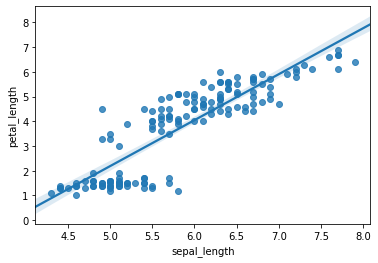

In [36]:
sns.regplot(x='sepal_length', y='petal_length', data=iris)

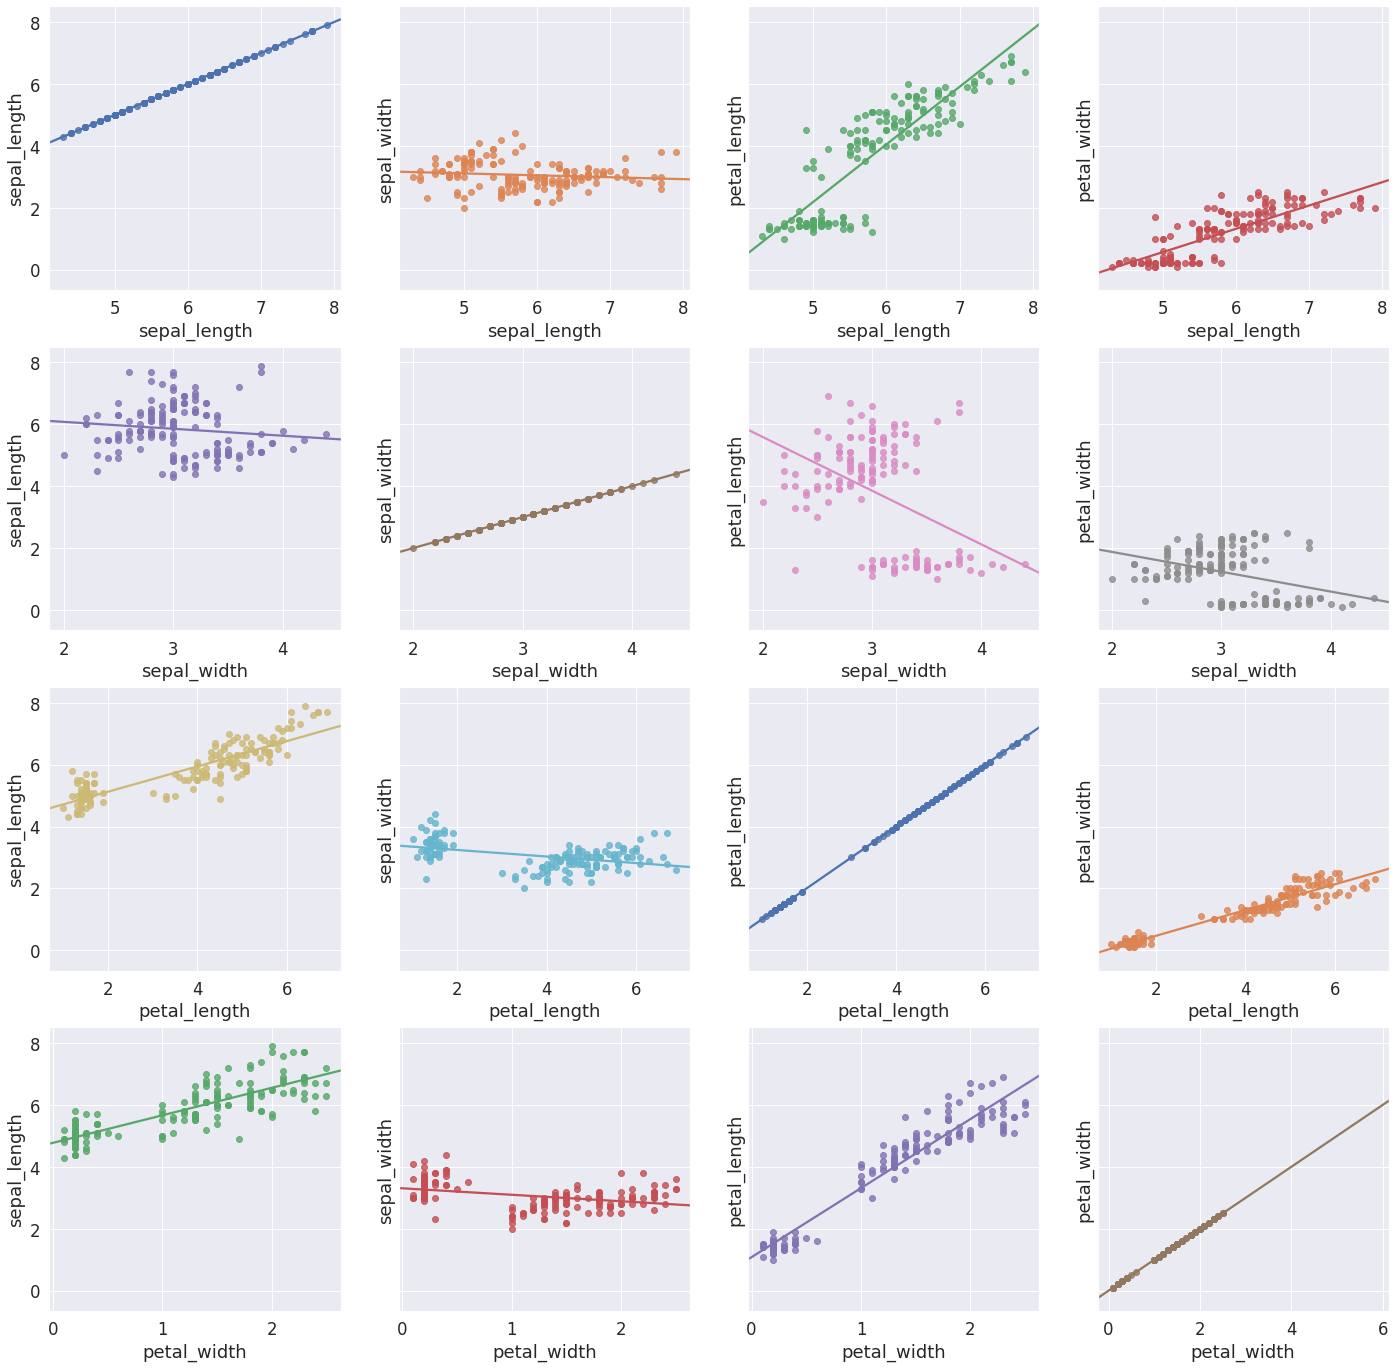

In [46]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(4, 4, figsize=(24, 24), sharey=True)
#plt.suptitle('16 simple regression')

for i in range(0, 4):
    for j in range(0, 4):
        sns.regplot(x=iris.columns[i], y=iris.columns[j], data=iris, ax=axes[i][j], ci=None)
        #axes[i][j].set_ylabel('')
     

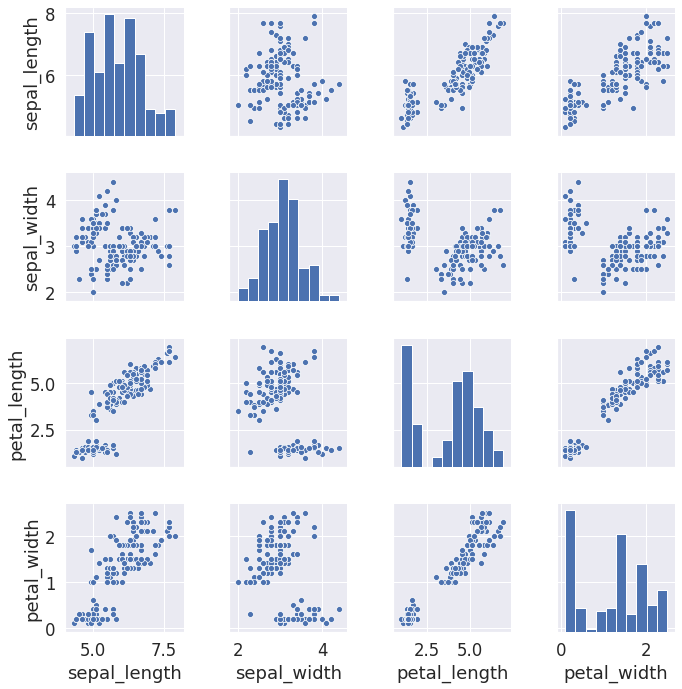

In [47]:
g = sns.pairplot(iris)

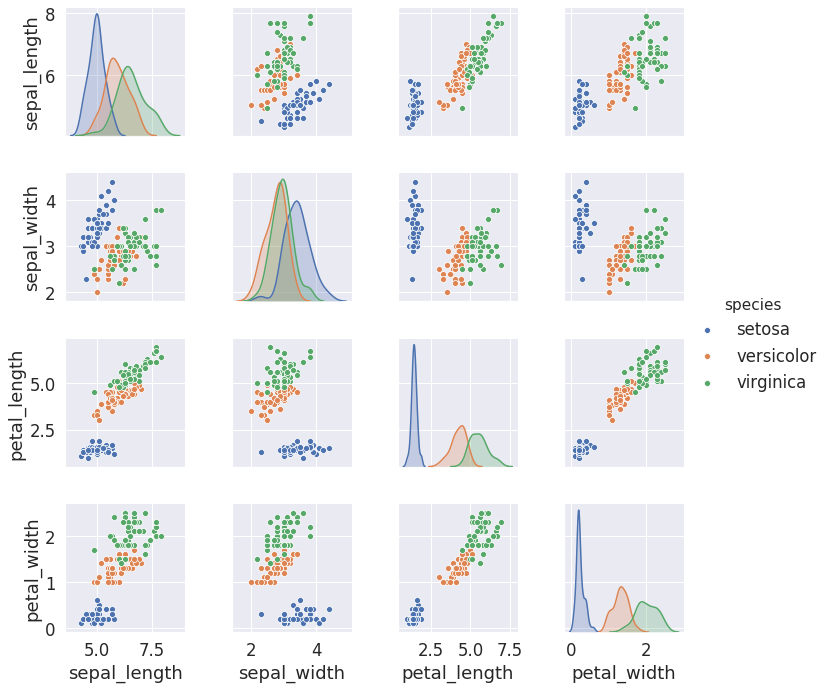

In [48]:
g = sns.pairplot(iris, hue="species")

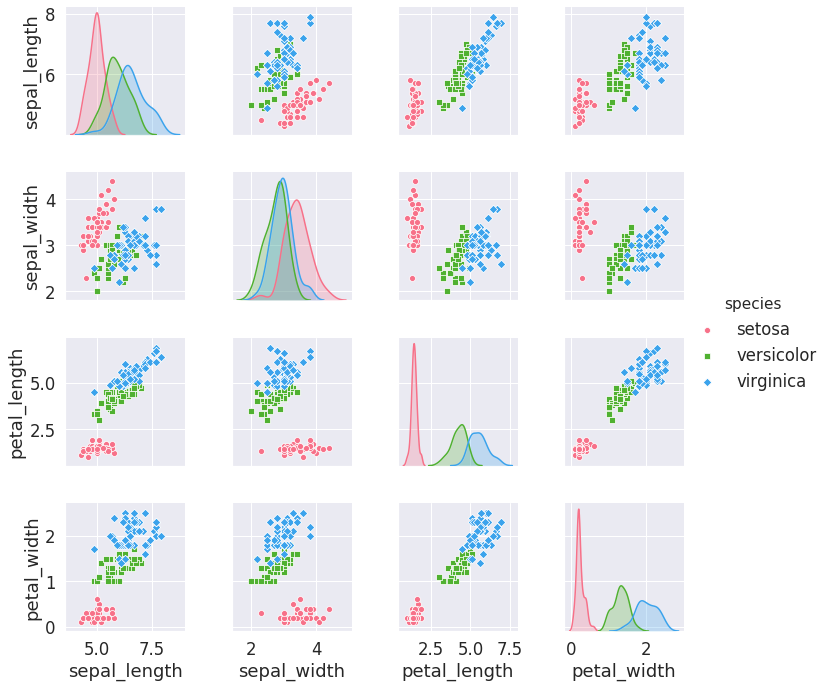

In [49]:
g = sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])

* Categorical plot

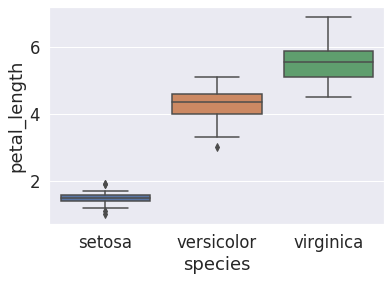

In [51]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)

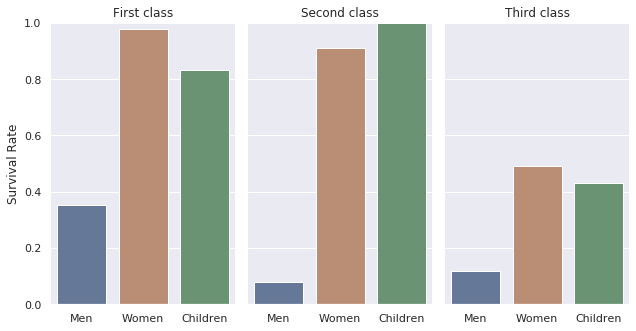

In [55]:
sns.set(font_scale=1)
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="who", y="survived", col="class",
               data=titanic, saturation=.5,
               kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
   .set_xticklabels(["Men", "Women", "Children"])
   .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
   .despine(left=True)) 

## Plotly
* Interactive plot
* Tutorial: https://plot.ly/python/

In [88]:
import matplotlib as plt
import plotly.offline as pyo
pyo.init_notebook_mode()

### Interactive 3D plot

In [100]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.layout.update(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

### Customize Button

In [99]:
import plotly.graph_objects as go

import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.layout.update(
    width=500,
    height=400,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    #template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.layout.update(
    updatemenus=[
        go.layout.Updatemenu(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.layout.update(
    annotations=[
        go.layout.Annotation(text="Trace type:", showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ]
)

fig.show()

In [93]:
import plotly.graph_objects as go

# Generate dataset
import numpy as np
np.random.seed(1)

x0 = np.random.normal(2, 0.4, 400)
y0 = np.random.normal(2, 0.4, 400)
x1 = np.random.normal(3, 0.6, 600)
y1 = np.random.normal(6, 0.4, 400)
x2 = np.random.normal(4, 0.2, 200)
y2 = np.random.normal(4, 0.4, 200)

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="DarkOrange")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="Crimson")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="Purple")
    )
)

# Add buttons that add shapes
cluster0 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="DarkOrange"))]
cluster1 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="Crimson"))]
cluster2 = [go.layout.Shape(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="Purple"))]

fig.layout.update(
    updatemenus=[
        go.layout.Updatemenu(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="Cluster 0",
                     method="relayout",
                     args=["shapes", cluster0]),
                dict(label="Cluster 1",
                     method="relayout",
                     args=["shapes", cluster1]),
                dict(label="Cluster 2",
                     method="relayout",
                     args=["shapes", cluster2]),
                dict(label="All",
                     method="relayout",
                     args=["shapes", cluster0 + cluster1 + cluster2])
            ],
        )
    ]
)

# Update remaining layout properties
fig.layout.update(
    title_text="Highlight Clusters",
    showlegend=False,
)

fig.show()

In [89]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.layout.update(
    sliders=sliders
)

fig.show()

In [102]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.2f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.2f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.2f" % df.Low.mean(),
                        ax=-40, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.2f" % df.Low.min(),
                        ax=0, ay=40)]

fig.layout.update(
    updatemenus=[
        go.layout.Updatemenu(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.layout.update(
    title_text="Yahoo",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## Networkx 
* For visualizing graph
* Tutorial: https://networkx.github.io/documentation/stable/tutorial.html

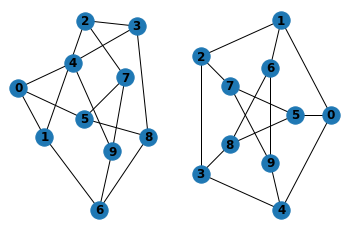

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

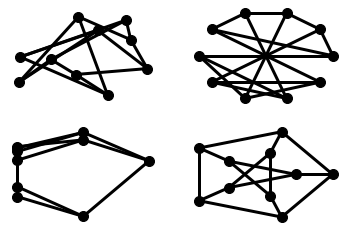

In [17]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)

nx.draw_circular(G, **options)
plt.subplot(223)

nx.draw_spectral(G, **options)
plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

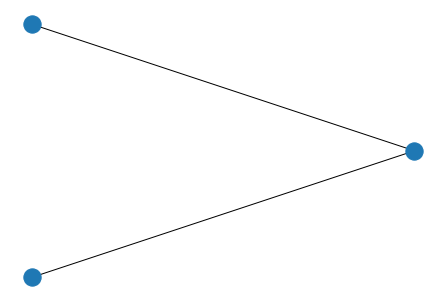

In [25]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
nx.draw_shell(G)

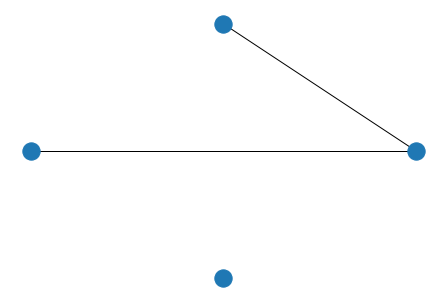

In [26]:
G.add_node(4)
nx.draw_shell(G)